# 逻辑回归

In [1]:
import numpy as np

#pip install matplotlib
import matplotlib.pyplot as plt

# 定义X，此时X为二维数据，平面上的。可以可视化为x, y

In [5]:
X = np.array([
    (0.5, 0.5), 
    (0.5, 1.0),
    (0.5, 1.5), 
    (0.8, 2.0), 
    (0.6, 1.2), 
    (0.9, 1.3), 
    (1.2, 0.9), 
    (1.5, 0.5) , 
    (1.1, 2.9), 
    (1.5, 3.0), 
    (1.6, 2.5), 
    (1.8, 2.0), 
    (1.9, 3.1), 
    (2.3, 2.8), 
    (2.3, 1.6), 
    (2.9, 1.5)
], np.float32)

In [14]:
label = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]], np.float32).T

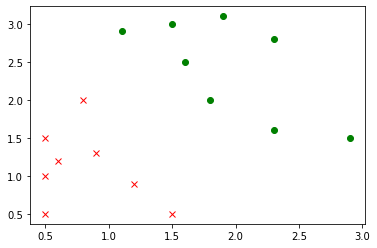

In [28]:
positive = X[label[:, 0]==1]
negative = X[label[:, 0]==0]
plt.plot(positive[:, 0], positive[:, 1], "go")
plt.plot(negative[:, 0], negative[:, 1], "rx")

# 定义参数W

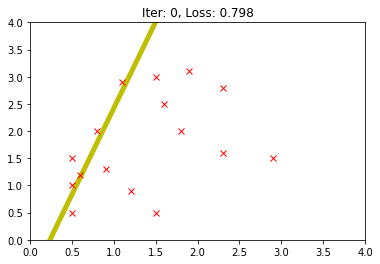

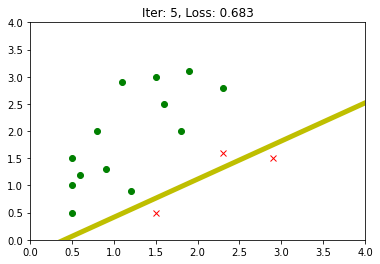

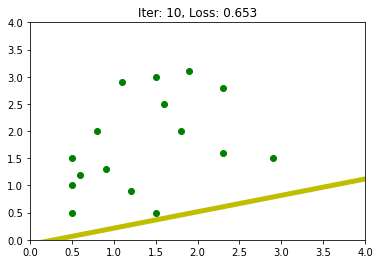

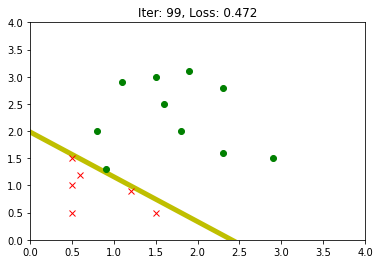

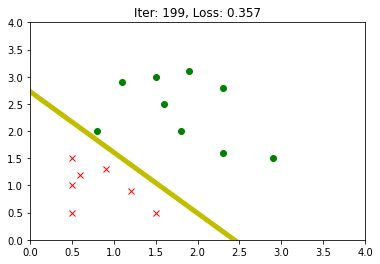

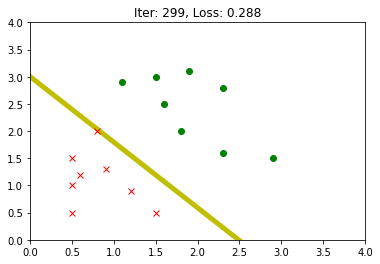

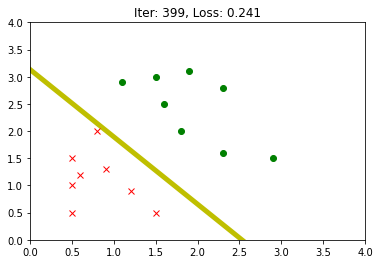

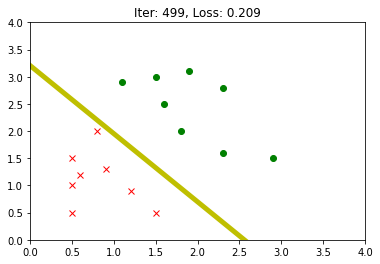

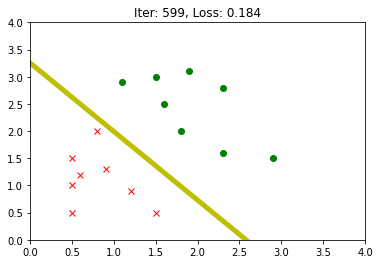

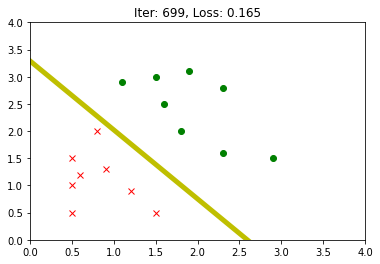

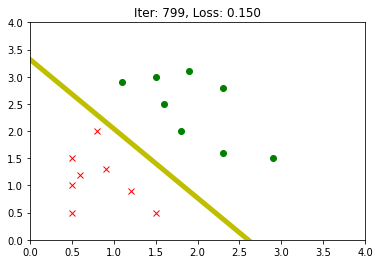

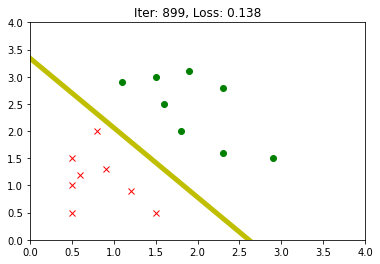

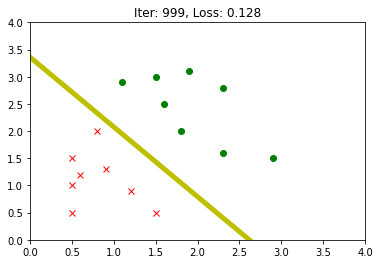

In [43]:
num_sample  = X.shape[0]
num_feature = X.shape[1]
num_output  = 1
batch_size  = num_sample

# 创建X_hat，增加1维度。0的位置插入一列，值全部为1
X_hat = np.insert(X, 0, values=1, axis=1)

# 创建W权重，为theta
W = np.random.normal(0, 1, size=(1 + num_feature, num_output))

lr = 0.1
epochs = 1000


# 定义变换压缩函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


for i in range(epochs):
    
    predict     = X_hat @ W
    probability = sigmoid(predict)
    
    # 二元交叉熵
    loss = -np.sum(label * np.log(probability) + (1 - label) * np.log(1 - probability)) / batch_size
    
    # 求导
    delta_predict = (probability - label) / batch_size
    delta_W       = X_hat.T @ delta_predict
    
    # 更新参数
    W = W - lr * delta_W
    
    if (i + 1) % 100 == 0 or i % 5 == 0 and (i / 5) < 3:
        
        # 对于既定的权重W，存在一条线使得 sigmoid(X @ W) = 0.5, -(X @ W) == 0
        # -([1, x, y] @ [ t0    = 0
        #                 t1
        #                 t2 ]) 
        # -(t0 + x t1 + y t2) = 0
        # y = -(t0 + xt1) / t2
        
        t0, t1, t2 = W
        tx = np.array([0, 5.0])
        ty = -(t0 + tx * t1) / t2
        
        positive = X[probability[:, 0]>=0.5]
        negative = X[probability[:, 0]<0.5 ]
        
        plt.title(f"Iter: {i}, Loss: {loss:.3f}")
        plt.plot(tx, ty, "y-", linewidth=5)
        plt.plot(positive[:, 0], positive[:, 1], "go")
        plt.plot(negative[:, 0], negative[:, 1], "rx")
        plt.axis([0, 4, 0, 4])
        plt.pause(0.01)